In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Data preperation for SQL

In [ ]:
# due to issues with double na value(" ", NULL) in the dataset for Postgresql 
# i will remove the NULL value here. From observing all the data sets the null value is repetitive for marketingdata revenue2 
# and visitors on the same days thus these rows will be removed and saved again

In [21]:
#Marketing Data
marketingdf = pd.read_csv('Marketing Data.csv')
marketingdf = marketingdf.iloc[:-3]

path='/Users/martynazglinska/Documents/Documents - Martyna’s MacBook Air/Endeavor/MarketingData.csv'
marketingdf.to_csv(path,index=False)

In [ ]:
#Revenue2 Data
revenue2 = pd.read_csv('Revenue Data 2.csv')
revenue2 = revenue2.iloc[:-3]
path='/Users/martynazglinska/Documents/Documents - Martyna’s MacBook Air/Endeavor/Revenue2.csv'
revenue2.to_csv(path,index=False)

In [ ]:
#Visitors
visitors = pd.read_excel('Visitors Data.xlsx')
visitors = visitors.iloc[:-3]
#as postgresql does not allow me to impor xlxs file i will save the file as csv 
path='/Users/martynazglinska/Documents/Documents - Martyna’s MacBook Air/Endeavor/Visitors.csv'
visitors.to_csv(path,index=False)

In [3]:
#Importing the cleaned data from SQL for revenue,cost per week visualisation
df = pd.read_csv('cleaned_data_sql.csv')

In [7]:
df['date'] = pd.to_datetime(df['date'])

### First Visualisation will be using a created column week from the date
### Second visualisation is using week id already existing in the table

### Visualisation using WEEK

In [8]:
#chosing week where Monday is the first day of the week 1
df['week'] = df['date'].dt.strftime('%W').astype(int)

In [9]:
df

,date,week_id,month_number,day_name,revenue,marketing_spending,promo,visitors,week
0,2021-05-09,61,5,Sunday,3861,871.00,No Promo,1303,18
1,2021-05-08,60,5,Saturday,5927,1121.88,No Promo,1483,18
2,2021-05-07,60,5,Friday,4587,1172.92,No Promo,2023,18
3,2021-05-06,60,5,Thursday,13021,2067.89,Promotion Red,2244,18
4,2021-05-05,60,5,Wednesday,7284,1119.60,No Promo,1400,18
...,...,...,...,...,...,...,...,...,...
177,2020-11-13,34,11,Friday,10000,2614.50,No Promo,2134,45
178,2020-11-12,34,11,Thursday,11712,1801.75,No Promo,1726,45
179,2020-11-11,34,11,Wednesday,12475,1559.38,Promotion Blue,1520,45
180,2020-11-10,34,11,Tuesday,10386,1298.25,Promotion Red,1455,45


In [13]:
#grouping the data by week to sum the revenue and marketing_spending per week
grouped_data = df.groupby('week').agg({'revenue': 'sum', 'marketing_spending': 'sum'}).reset_index()

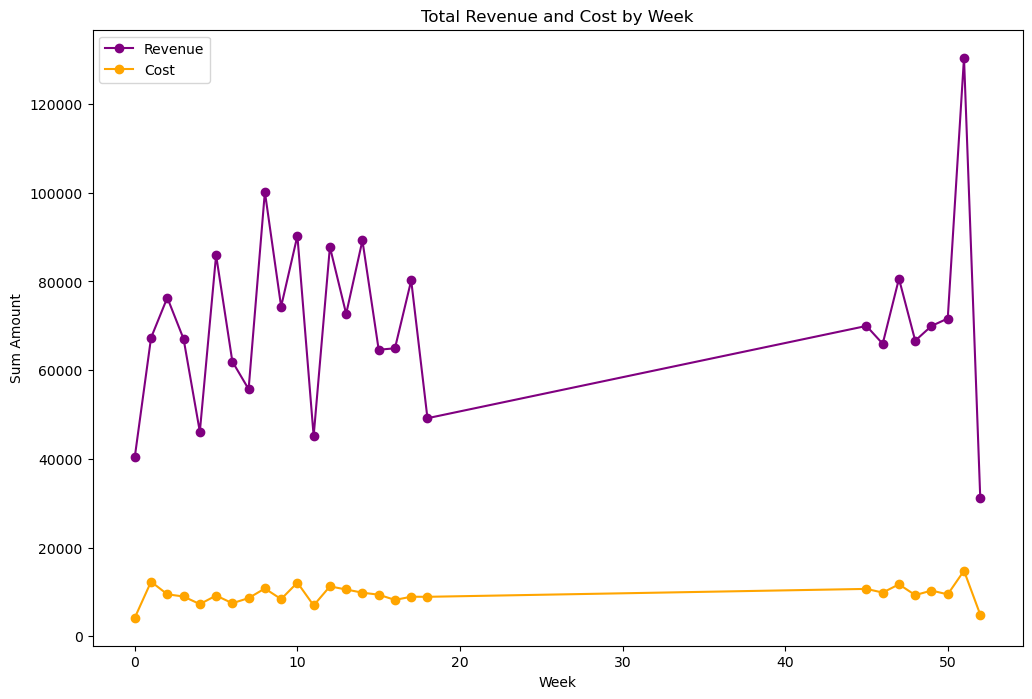

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(grouped_data['week'], grouped_data['revenue'], label='Revenue', marker='o',color='purple')
plt.plot(grouped_data['week'], grouped_data['marketing_spending'], label='Cost', marker='o',color='orange')

plt.xlabel('Week')
plt.ylabel('Sum Amount')
plt.title('Total Revenue and Cost by Week')
plt.legend()

# Show the plot
plt.show()

### Visualisation using Week_ID

In [16]:
#grouping the data by week to sum the revenue and marketing_spending per week
grouped_data_id = df.groupby('week_id').agg({'revenue': 'sum', 'marketing_spending': 'sum'}).reset_index()

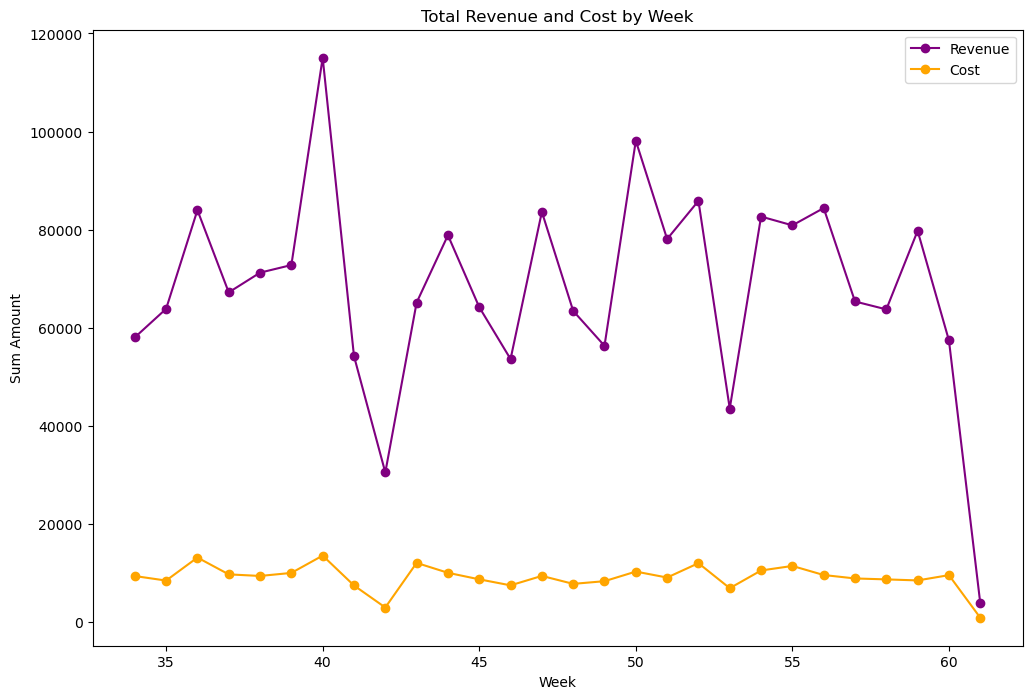

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(grouped_data_id['week_id'], grouped_data_id['revenue'], label='Revenue', marker='o',color='purple')
plt.plot(grouped_data_id['week_id'], grouped_data_id['marketing_spending'], label='Cost', marker='o',color='orange')

plt.xlabel('Week')
plt.ylabel('Sum Amount')
plt.title('Total Revenue and Cost by Week')
plt.legend()

# Show the plot
plt.show()